In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [5]:
def log_transform(df):
    # copy the dataframe
    tdf = df.copy()
    # apply log scaling
    for column in tdf.columns:
        tdf[column] = np.log(tdf[column])

    tdf.replace([np.inf, -np.inf], np.nan, inplace=True)
    tdf = tdf.astype(float)
    tdf = tdf.interpolate(method='linear', axis=0).ffill().bfill()
#     tdf = tdf.dropna(axis='columns')
    tdf = tdf.fillna(0)

    return tdf

def boxcox(df):
    # copy the dataframe
    _df = df.copy()

    # apply log scaling
    for column in _df.columns:

#         tdf[column] = stats.boxcox(tdf[column])
        _df[column] = boxcox1p(_df[column], 0.25)

#     _df = _df.dropna(axis='columns')
    _df = _df.fillna(0)
    _df = _df.astype(float)

    return _df

def min_max_scaling(df):
    # copy the dataframe
    tdf = df.copy()
    # apply min-max scaling
    for column in tdf.columns:
        tdf[column] = (tdf[column] - tdf[column].min()) / (tdf[column].max() - tdf[column].min())
#     tdf = tdf.dropna(axis='columns')
    tdf = tdf.fillna(0)
    return tdf

def unwrap_df(df):
    udf = df.copy()
    def unwrap_col(col):
        # udf[col] =  np.unwrap(2 * udf[col]) / 2
        udf[col] =  np.unwrap(udf[col])
    cols = udf.columns
    list(map(lambda col: unwrap_col(col), cols))
    return udf
            

def savgol(df):
    # copy the dataframe
    _df = df.copy()

    # apply log scaling
    for column in _df.columns:
        
        _df[column] = savgol_filter(_df[column], 9, 1)

#     _df = _df.dropna(axis='columns')
    _df = _df.fillna(0)
    _df = _df.astype(float)
    return _df



In [6]:
exportPath = './export/'
marketPath = './market/'
imgPath = './image/'
tmpPath = './tmp/'

if not os.path.exists(exportPath):
    os.makedirs(exportPath)
if not os.path.exists(marketPath):
    os.makedirs(marketPath)
if not os.path.exists(imgPath):
    os.makedirs(imgPath)
if not os.path.exists(tmpPath):
    os.makedirs(tmpPath)


In [28]:
astro_df = pd.read_csv(marketPath + 'slim_geoAstro.csv',parse_dates = True,index_col=0)

earliest = astro_df.iloc[:1].index
earliest = earliest.strftime('%Y-%m-%d')[0]

latest = astro_df.iloc[-1:].index
latest = latest.strftime('%Y-%m-%d')[0]

print(earliest, latest)

#######################################################################################################

# start_date = "2020-01-01"
# end_date = "2021-09-17"

# start_date = earliest
# end_date = '2021-01-01'

# start_date = "2017-01-01"
start_date = earliest
end_date = "2025-12-31"
#######################################################################################################

after_start_date = astro_df.index >= start_date
before_end_date = astro_df.index <= end_date
between_two_dates = after_start_date & before_end_date
astro_df = astro_df.loc[between_two_dates]

#######################################################################################################

print(astro_df)

1800-01-01 2199-12-31
            geo-declination-Sun  geo-declination-Moon  \
timestamp                                               
1800-01-01           -23.054837             -7.914110   
1800-01-02           -22.971090             -2.225474   
1800-01-03           -22.879714              3.421407   
1800-01-04           -22.780757              8.865468   
1800-01-05           -22.674272             13.956629   
...                         ...                   ...   
2025-12-27           -23.322698             -0.639185   
2025-12-28           -23.276686              5.757035   
2025-12-29           -23.222903             12.048039   
2025-12-30           -23.161378             17.883980   
2025-12-31           -23.092144             22.831199   

            geo-declination-Mercury  geo-declination-Venus  \
timestamp                                                    
1800-01-01               -20.234806             -15.529954   
1800-01-02               -20.207050             -1

In [29]:
df = astro_df
df['y'] = astro_df['geo-distance-Venus']

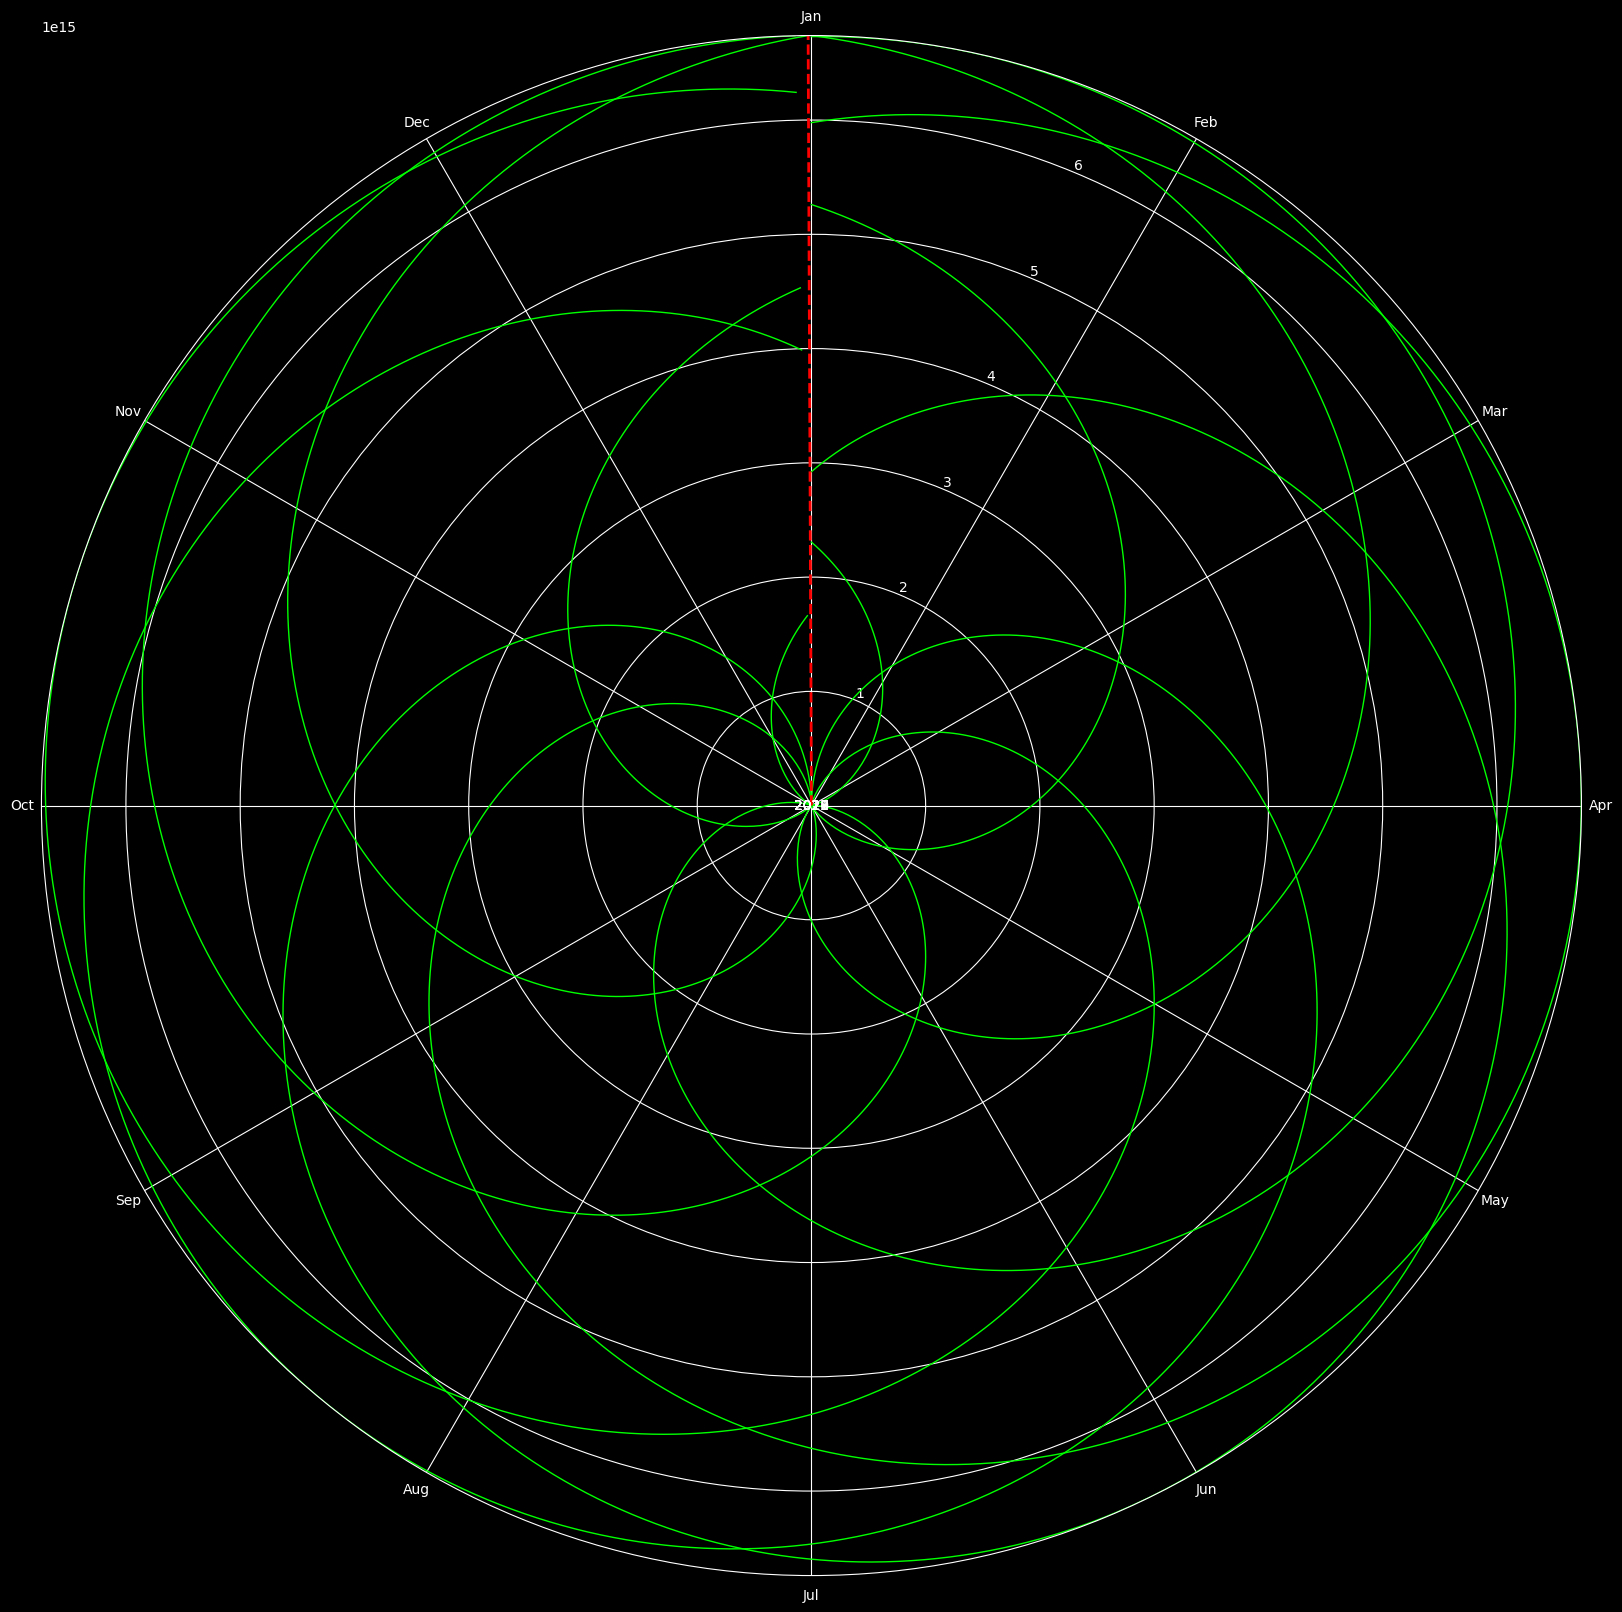

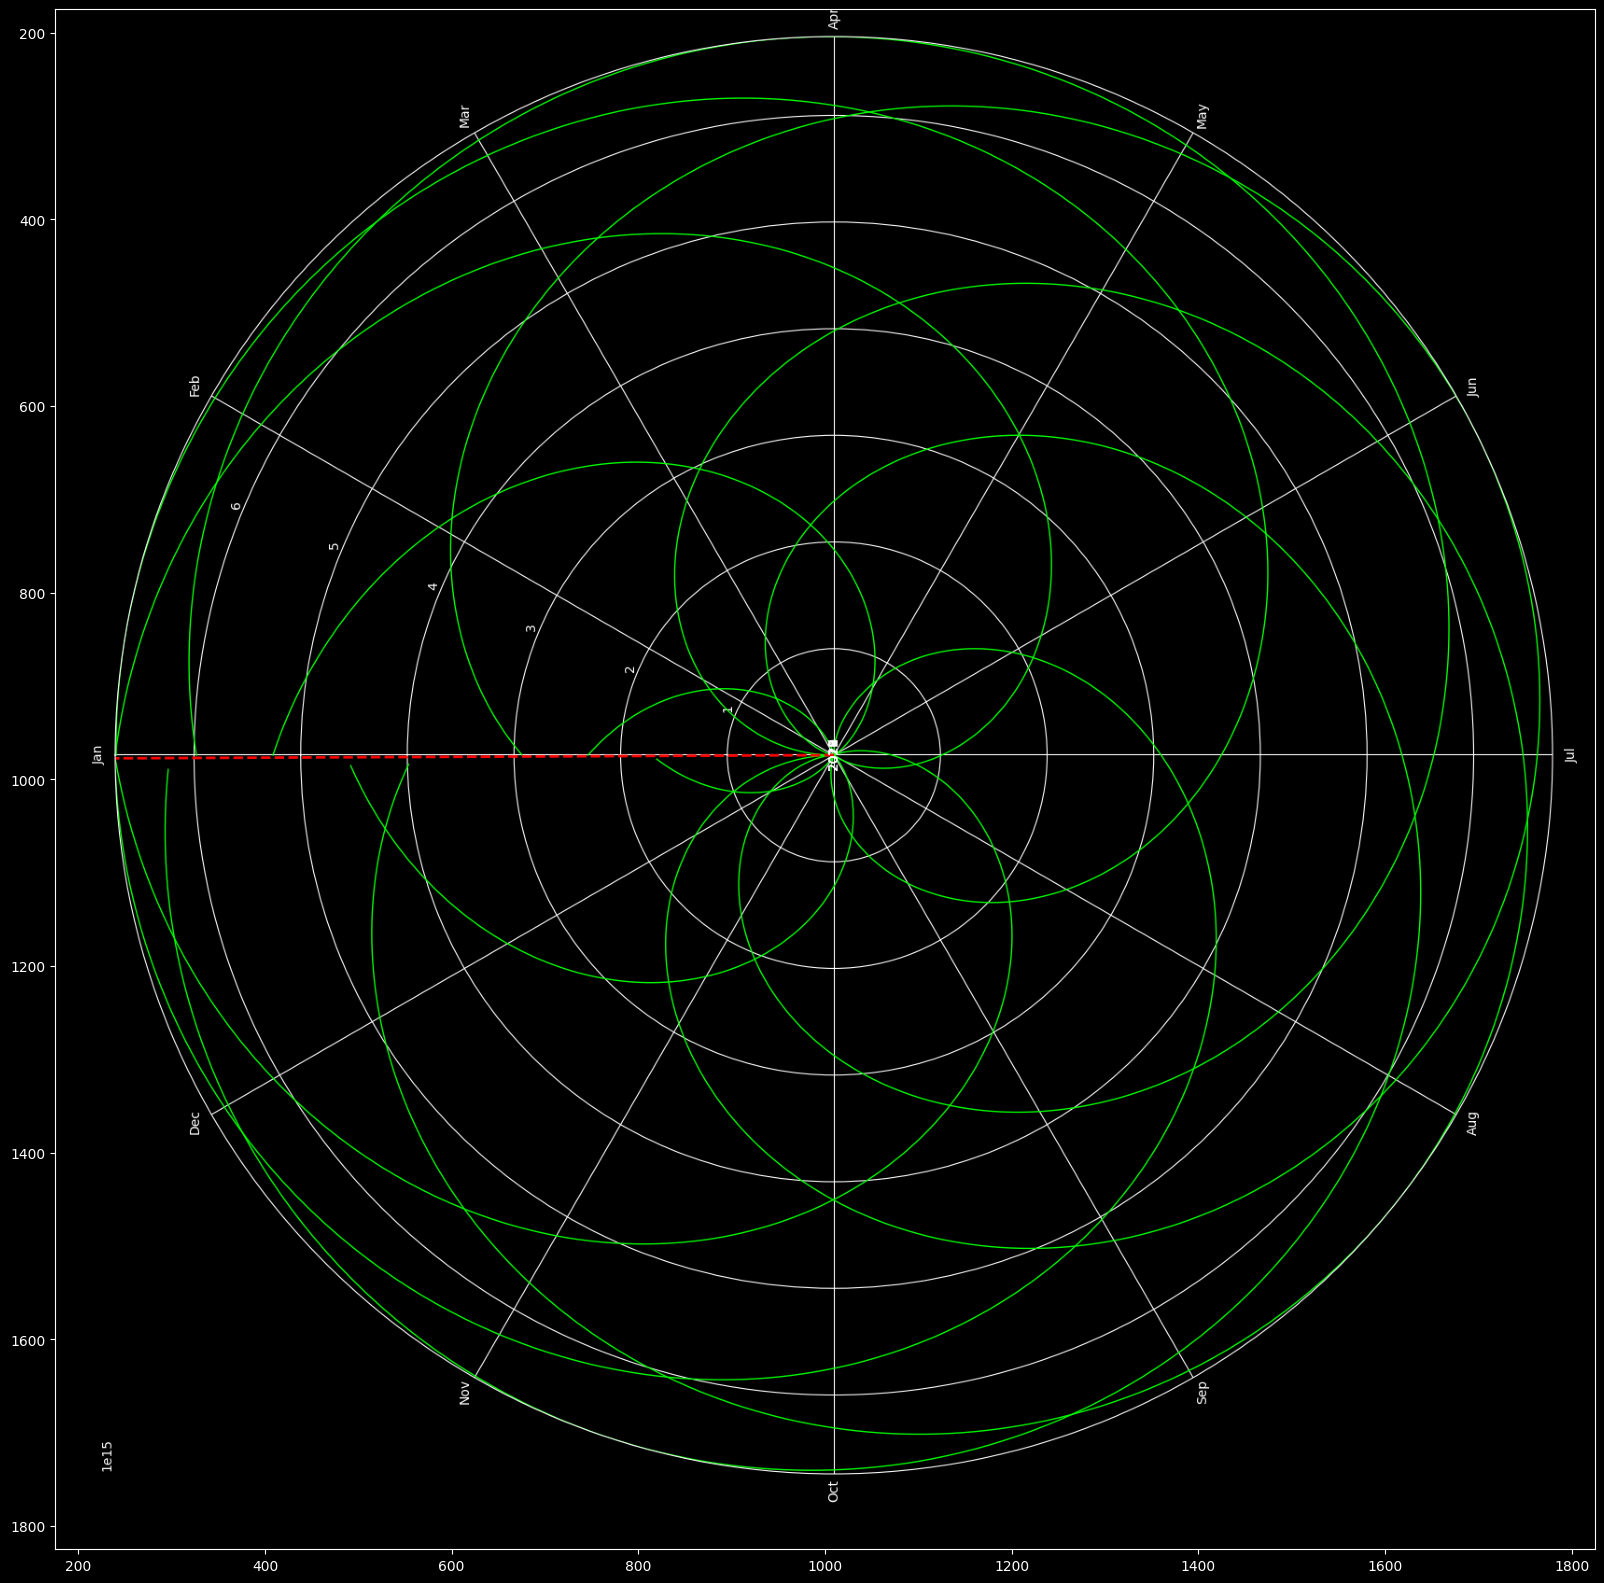

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_spiral_chart(df, start_year=None, end_year=None):
    """
    Plots a spiral chart for the given time series data.

    Args:
        df (pandas.DataFrame): The input data with a DatetimeIndex and a 'close' column.
        start_year (int, optional): The starting year to include in the plot. If not provided, the earliest year in the data will be used.
        end_year (int, optional): The ending year to include in the plot. If not provided, the latest year in the data will be used.

    Returns:
        None
    """
    # Filter the data based on the provided start and end years
    if start_year:
        df = df[df.index.year >= start_year]
    if end_year:
        df = df[df.index.year <= end_year]

    # Normalize data for each year
    data = df['y'].values
    years = df.index.year.values

    normalized_data = np.zeros_like(data, dtype=float)
    for year in np.unique(years):
        mask = years == year
        year_data = data[mask]
        year_min = np.min(year_data)
        year_range = np.max(year_data) - year_min
        normalized_data[mask] = (year_data - year_min) / (year_range if year_range != 0 else 1)

    # Determine angles for each data point
    num_days_in_year = 365.25
    angles = 2 * np.pi * (df.index.dayofyear - 1) / num_days_in_year

    # n = -70
    # rotation_angle = np.radians(n)  # Replace n with your desired rotation in degrees
    # angles = 2 * np.pi * (df.index.dayofyear - 1) / num_days_in_year + rotation_angle

    # Adjust scaling of each spiral
    padding = np.max(data) * 0.1
    r = (years + normalized_data * (1 + padding)) * np.max(data)

    # Set a dark style for the plot
    plt.style.use('dark_background')

    # Create polar chart
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='polar')



    # Plot the data for all years
    for year in np.unique(years):
        mask = years == year
        year_angles = angles[mask]
        year_r = r[mask]
        ax.plot(year_angles, year_r, color='#00FF00', linewidth=1)

    # Add labels to rings
    for year in np.unique(years):
        mask = years == year
        year_pos = (year + 0.5) * np.max(data)
        ax.text(0, year_pos, str(year), ha='center', va='center', fontsize=10)

    # Set y-axis limits
    ax.set_rlim([np.min(r), np.max(r)])

    # Customize chart
    ticks = 2 * np.pi / 12 * np.arange(12)
    # ticklabels = [date.strftime('%b') for date in pd.date_range(start=df.index.min(), periods=12, freq='MS')]
    ticklabels = [date.strftime('%b') for date in pd.date_range(start='2021-01-01', periods=12, freq='MS')]

    ax.set_xticks(ticks)
    ax.set_xticklabels(ticklabels)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)  # Set the direction of rotation to clockwise

    # After the plot is created, add a vertical line on the last data point
    last_angle = angles[-1]
    last_r = r[-1]
    ax.axvline(x=last_angle, ymin=0, ymax=last_r, color='red', linestyle='--', linewidth=2)
    plt.savefig(imgPath + 'Astro ' + 'Polar',bbox_inches='tight')
    plt.show()

#------------------------------------------------------------------------------------------------------
    %matplotlib inline
    
    # %config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
    # %config InlineBackend.print_figure_kwargs={'edgecolor' : "w"}
    # plt.rcParams['axes.facecolor'] = 'w'
    # plt.rcParams['axes.edgecolor'] = 'w'
    # plt.rcParams['savefig.facecolor'] = 'w'

    
    rotation_angle = 90
    # Convert the figure to an image
    
    fig.canvas.draw()
    img = np.array(fig.canvas.renderer.buffer_rgba())
    
    # Create a PIL Image object and rotate it by the specified angle
    pil_img = Image.fromarray(img)
    
    rotated_img = pil_img.rotate(rotation_angle, resample=Image.BICUBIC, expand=False)
    
    # Display the rotated image
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.imshow(rotated_img)
    
    # Calculate the center of the original image
    center_x = rotated_img.size[0] / 2
    center_y = rotated_img.size[1] / 2
    
    # Set the size of the zoomed region, to zoom out use bigger number
    zoom_size = 1650
    
    # Set the limits of the x and y axes to zoom in on the center of the image
    ax.set_xlim(center_x - zoom_size/2, center_x + zoom_size/2)
    ax.set_ylim(center_y + zoom_size/2, center_y - zoom_size/2)
    
    # plt.savefig(imgPath + 'Astro ' + 'Polar',bbox_inches='tight')
    
    plt.show()



# Example usage
if __name__ == '__main__':
    # Load your data into a pandas DataFrame 'df' with a DatetimeIndex and a 'close' column
    plot_spiral_chart(df, start_year=2017, end_year=2024)